In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [7]:
# function to extract the slowness parameter that provide a quantitative evaluation of the convergence rate
def extract_slowness(test_data, fit_epochs = 100, ymin=92, ymax=100, ylim=True, in100=False, nclasses=10):
    ### input parameters explained
    # test_data = test curve obtained during training of the model
    # fit_epochs = number of epochs on which we perform the fit --> advice is to use the epochs before the learning rate decay
    # ymin and ymax = limits for the plot
    # in100 = if True the test curve is in the range [0,100], if False it is in [0,1]
    # nclasses = number of classes e.g. 10 for MNIST and CIFAR10, 100 for CIFAR100
    
    # prepare the data
    if type(test_data) is not list:
        test_data = list(test_data)
    # add the chance level before the test accuracy --> needed for the fit
    if in100:
        test_data = [10]+test_data 
    else:
        test_data = [0.1]+test_data
    if nclasses == 100:
        test_data[0] = test_data[0]/10 # the chance level is 0.01 or 1 if there are 100 classes (not 0.1 or 10)
    
    data_fit = test_data[0:fit_epochs] 
    data = data_fit[0:fit_epochs]
    acc_max = np.max(data_fit)
    # here perform the fit to extract the slowness data
    [param,res] = curve_fit(lambda X,a: (acc_max * X)/(a + X), np.arange(0,np.shape(data)[0]), data_fit, p0=[0.5])
    slowness = param[0]
    
    # plot the fitted curve and the actual test curve
    x = np.arange(0,fit_epochs)
    y = (acc_max * x)/(slowness + x)
    if in100 == False:
        data_fit = [i * 100 for i in data_fit]
        y = y*100
    plt.figure()
    plt.plot(np.arange(1,len(data)+1),data_fit,label='test curve',ls='--',alpha = 1.0)
    plt.plot(np.arange(1,fit_epochs+1),y,label='fit: s={}'.format(np.round(slowness,3)),ls='-',alpha = 1.0)
    plt.xlabel('Training epochs', fontsize=14)
    plt.ylabel('Accuracy [%]', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if ylim is not None:
        plt.ylim([ymin,ymax])

    plt.legend()
    print('accmax=',acc_max,'slowness=',slowness)

In [ ]:
# load your test curve
curve = np.load ...

accmax= 0.98643 slowness= 0.026016557401307188


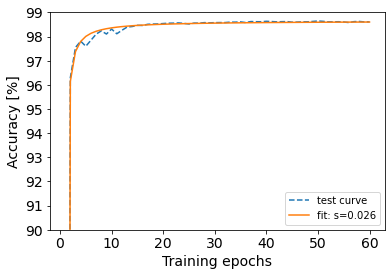

In [8]:
extract_slowness(np.mean(curve, axis=0), fit_epochs=60, ymin=90,ymax=99)